In [1]:
import sys; sys.path.insert(0, '/home/j/jwoo/my_python/lib/python3.11/site-packages/')
import cellhint

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/uma

In [2]:
import scanpy as sc

In [3]:
adata = sc.read('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/merged_2.h5ad')
adata

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [4]:
adata.obs.Data.value_counts()

Data
Adams       15000
Reyfman     15000
Morse       15000
Haberman    14924
HO          14388
Name: count, dtype: int64

In [5]:
adata = adata.raw.to_adata()

In [6]:
del adata.var
del adata.uns

adata

AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [7]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, batch_key = 'Data', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'orig.ident' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical
... storing 'barcode' as categorical
... storing 'original_barcode' as categorical
... storing 'orig.ident.y' as categorical
... storing 'CellBarcode_Identity' as categorical
... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical
... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Donor' as categorical
... storing 'CellType_v2' as categorical
... storing 'Data' as categorical
... storing 'old_cluster' as categorical
... storing 'RNA_snn_res.0.8' as categorical
... storing 'Celltype_Original' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'Disease' as categorical
... storing 'Disease2' as categorical
... storing 'Type' as categorical
... storing 'CellType' as categorical
... storing 'RNA_snn_res.1.2' as categorical
... storing 'Library'

KeyboardInterrupt: 

In [ ]:
sc.pl.umap(adata, color = ['Data'])

In [8]:
adata

AnnData object with n_obs × n_vars = 74312 × 1413
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_la

In [9]:
alignment = cellhint.harmonize(adata, 'Data_HO', 'CellType_Integrated_HO',use_rep='X_harmony')

🏆 Reordering datasets
⚠️ Warning: only two datasets exist, no need to reorder them
🖇 Harmonizing cell types of HO and Public
🖋️ Reannotating cells
✅ Harmonization done!


In [10]:
alignment

Cross-dataset cell type alignment for 2 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'HO', 'Public'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [11]:
alignment.write('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_alignment_HO&Others.pkl')

In [12]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment.relation.head(20)

,HO,relation,Public
0,NONE,=,HSP+ Mac
1,NONE,=,MT MonoMac
2,NONE,=,MT_AM
3,NONE,=,Mac_Lymph doublets
0,CMonos,=,CMono
1,Cycling AM_2,=,Proliferating AM
2,NCMonos,=,NCMono
3,pDCs,=,pDC
0,DCs,∋,cDC1
1,DCs,∋,cDC2


In [13]:
alignment.groups

array(['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6',
       'Group7', 'Group8', 'Group9', 'Group9', 'Group10', 'Group10',
       'Group11', 'Group11', 'Group12', 'Group12', 'Group12', 'Group13',
       'Group14', 'Group15', 'Group16', 'Group17', 'Group18', 'Group19',
       'Group20'], dtype=object)

In [14]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCTGTCAACACCA-1_1_1,Public,FABP4+ AM,IGF-1 Macs ∈ FABP4+ AM,Group12
AAATGCCGTGGCGAAT-1_1_1,Public,cDC2,DCs ∋ cDC2,Group9
AACACGTTCGGTCTAA-1_1_1,Public,Proliferating AM,Cycling AM_2 = Proliferating AM,Group6
AAGCCGCCAAATACAG-1_1_1,Public,FOL2R IM,SPP1+ AMs ∋ FOL2R IM,Group10
AAGGCAGAGCCAGGAT-1_1_1,Public,CMono,CMonos = CMono,Group5
...,...,...,...,...
TTGGCAACAGATCGGA-1_16_5,Public,CMono,CMonos = CMono,Group5
TTGGCAAGTCATGCAT-1_16_5,Public,Transitional_MonoMacs,SPP1+ AMs ∋ Transitional_MonoMacs,Group10
TTGTAGGCATGCCACG-1_16_5,Public,SPP1+ Mac,UNRESOLVED = SPP1+ Mac,Group20


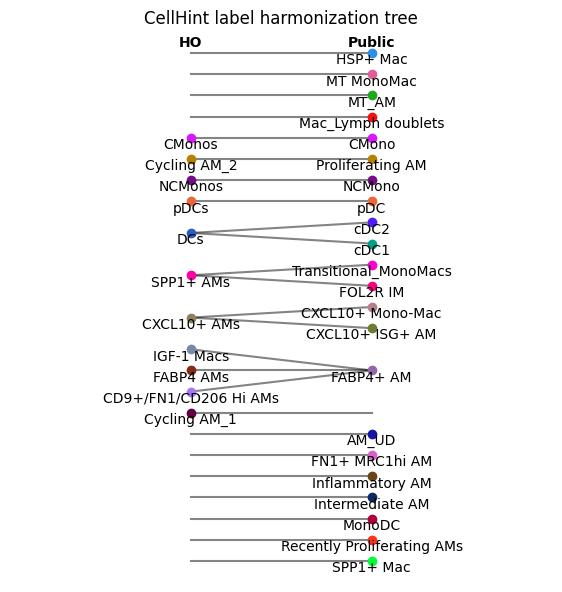

In [15]:
cellhint.treeplot(alignment)

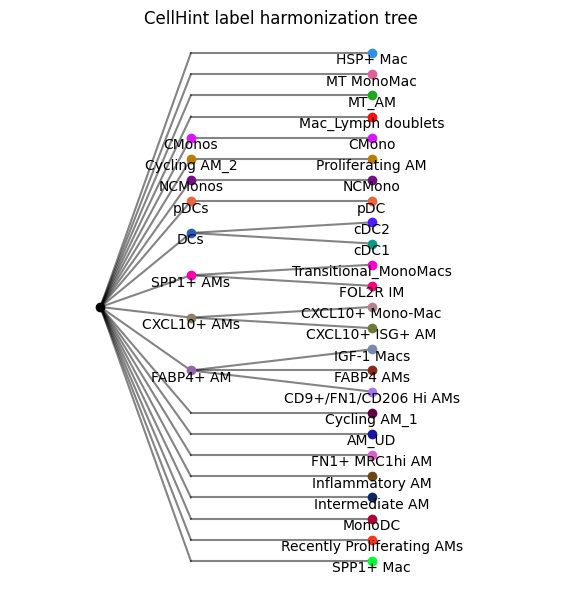

In [16]:
cellhint.treeplot(alignment,order_dataset = True)

In [17]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,HO: CD9+/FN1/CD206 Hi AMs,HO: CMonos,HO: CXCL10+ AMs,HO: Cycling AM_1,HO: Cycling AM_2
HO: CD9+/FN1/CD206 Hi AMs,0.621926,0.000342,0.036806,0.056838,0.022505
HO: CMonos,0.000342,0.892857,0.005252,0.000888,0.000000
HO: CXCL10+ AMs,0.036806,0.005252,0.672269,0.001050,0.011742
HO: Cycling AM_1,0.056838,0.000888,0.001050,0.625222,0.034561
HO: Cycling AM_2,0.022505,0.000000,0.011742,0.034561,0.796477


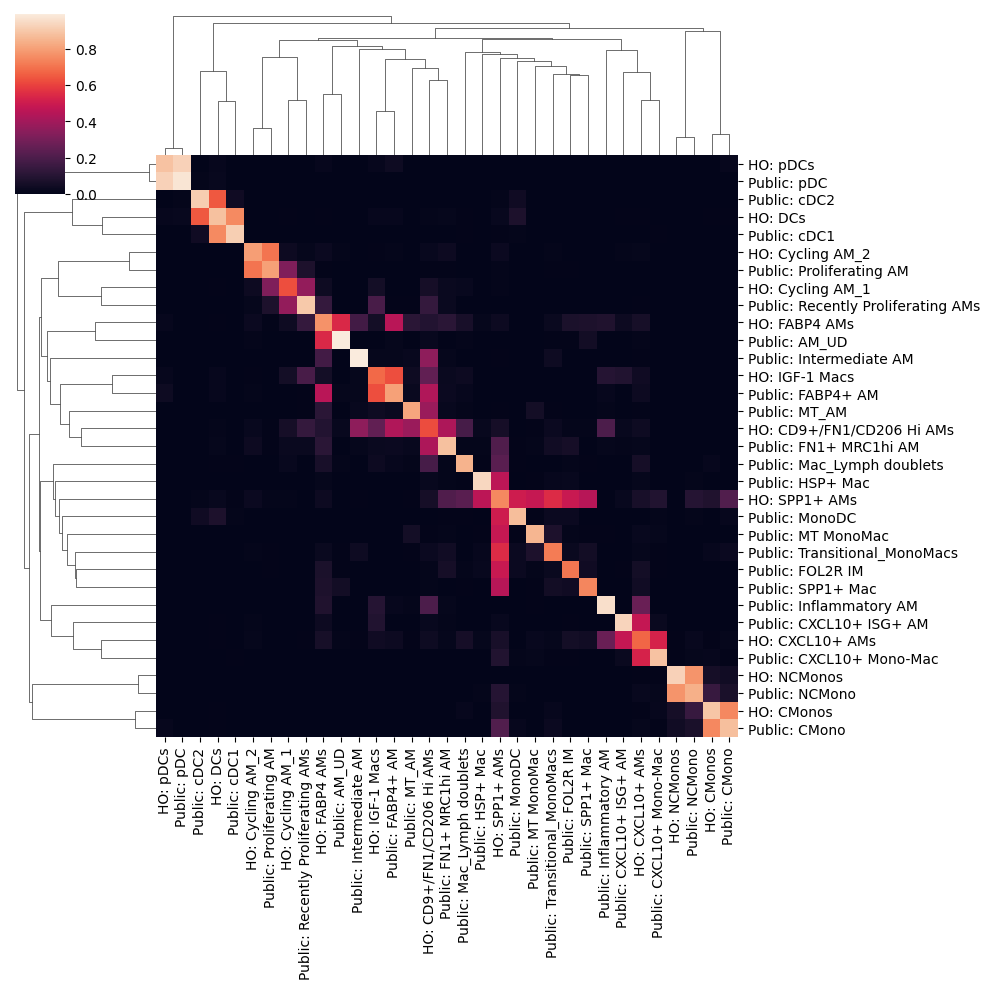

In [18]:
import seaborn as sns

sns.clustermap(member_mat)

In [ ]:
flag = member_mat.index.str.contains('CXCL10|SPP1|FABP4')
sns.clustermap(member_mat.loc[flag,flag])



In [ ]:
flag = member_mat.index.str.contains('AM|Mac')
sns.clustermap(member_mat.loc[flag,flag])

In [ ]:
alignment.base_distance

In [ ]:
alignment.base_distance.assignment

In [ ]:
alignment.best_align(dataset_order = ['HO', 'Adams', 'Morse', 'Haberman', 'Reyfman'])

In [ ]:
alignment.relation.head(10)

In [ ]:
alignment.reannotate()

In [ ]:
cellhint.treeplot(alignment)

In [ ]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

In [ ]:
import seaborn as sns

sns.clustermap(member_mat)

In [ ]:
dist_mat = alignment.base_distance.to_meta()
dist_mat.iloc[:5, :5]

In [ ]:

sns.clustermap(dist_mat)